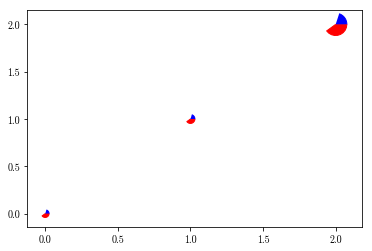

In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
# first define the ratios
r1 = 0.2       # 20%
r2 = r1 + 0.4  # 40%

# define some sizes of the scatter marker
sizes = np.array([60, 80, 500])

# calculate the points of the first pie marker
#
# these are just the origin (0,0) +
# some points on a circle cos,sin
x = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
y = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
xy1 = np.column_stack([x, y])
s1 = np.abs(xy1).max()

x = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
y = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
xy2 = np.column_stack([x, y])
s2 = np.abs(xy2).max()

x = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
y = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
xy3 = np.column_stack([x, y])
s3 = np.abs(xy3).max()

fig, ax = plt.subplots()
ax.scatter(range(3), range(3), marker=(xy1, 1),
           s=s1 ** 2 * sizes, facecolor='blue')
# ax.scatter(range(3), range(3), marker=(xy2, 0),
#            s=s2 ** 2 * sizes, facecolor='green')
ax.scatter(range(3), range(3), marker=(xy3, 0),
           s=s3 ** 2 * sizes, facecolor='red')

plt.show()

In [24]:
from clip_analysis import plot_repetitive_elements_sunburst as sunburst

In [21]:
from clip_analysis import parsers as p

In [29]:
input_dir = '/home/bay001/projects/eric_clip_paper_20180120/permanent_data/rep_element_pie/inputs/'

df = pd.read_table(
    os.path.join(input_dir, '20180218_ENCODEFINAL.txt.nopipes.txt'),
    names=[
        'element','uID','name2','name','rep','ip_reads',
        'IP_clip_rpr','input_reads','INPUT_clip_rpr','Fold_enrichment','information_content'
    ],
    skiprows=1
)

df['cell'] = df['name2'].apply(lambda x: x.split('-')[1])
df['rbp'] = df['name2'].apply(lambda x: x.split('-')[0])

df.set_index('name', inplace=True)
df.head()

,element,uID,name2,rep,ip_reads,IP_clip_rpr,input_reads,INPUT_clip_rpr,Fold_enrichment,information_content,cell,rbp
name,,,,,,,,,,,,
384_01_GTF2F1,Alu,384,GTF2F1-HepG2,_01,85192,0.010236,146480,0.011640,0.879370,-0.001898,HepG2,GTF2F1
384_02_GTF2F1,Alu,384,GTF2F1-HepG2,_02,97086,0.012360,146480,0.011640,1.061876,0.001071,HepG2,GTF2F1
722_01_EXOSC5,Alu,722reseq2,EXOSC5-HepG2,_01,28054,0.001840,131871,0.007684,0.239437,-0.003794,HepG2,EXOSC5
722_02reseq_EXOSC5,Alu,722reseq2,EXOSC5-HepG2,_02,24749,0.001319,131871,0.007684,0.171621,-0.003353,HepG2,EXOSC5
206_01_HNRNPK,Alu,206,HNRNPK-HepG2,_01,70957,0.014171,116845,0.016044,0.883225,-0.002539,HepG2,HNRNPK


In [217]:
color_fn = os.path.join(input_dir, 'color_list_269.lines')
colors = sunburst.make_colordict(set(df['element']), color_fn)

fold_change_cutoff = 4
hard_cutoff = 0.05
soft_cutoff = 0.05

# progress = tnrange(len(list(set(df.index[:5]))))
for rbp in list(set(df.index[:5])):
    dx = df.loc[rbp]
    dx.set_index('element', inplace=True)
    vals = sunburst.get_pie_values(dx, fold_change_cutoff, soft_cutoff, hard_cutoff, [])

Alu
antisense_ERVK
telo
ERVL-MaLR
antisense_RNU3
antisense_U17
acro
antisense_acro
CR1
L2
unique_noncoding_distintron
antisense_RNU5B
RNU6
hAT-Blackjack
chrM
antisense_hAT-Blackjack
antisense_ERV
antisense_SNORD
DNA
antisense_MRP
antisense_snRNA
antisense_RNU6
antisense_RNU5
Deu
SNORD
antisense_L2
antisense_ERVL-MaLR
LTR
TcMar-Mariner
antisense_RNA5S
antisense_MIR
antisense_Satellite
ERV1
Low_complexity
RNA5-8S
hAT-Tip100
antisense_tRNA
antisense_SCARNA
KER
antisense_RNU105
antisense_KER
Helitron
Gypsy
unique_proxintron
RNU4
Satellite
unique_5utr
RNU12
antisense_Other
unique_distintron
antisense_Eutr
antisense_Gypsy
U17
hAT
VTRNA1
RNA28S
unique_CDS
H1RNA
antisense_snoU13
Dong-R4
antisense_RNU5E
ERVL
antisense_scRNA
RNU5F
RNU6ATAC
antisense_rRNA_extra
antisense_LTR
antisense_VTRNA2
antisense_RNU4ATAC
antisense_ERV3
antisense_RNU12
tRNA
RNU5D
antisense_RNU1
RNU4ATAC
ERV3
VTRNA3
HSFAU
RN7SK
TcMar
RNU1
antisense_RNU6ATAC
antisense_L1
antisense_ERV1
antisense_RNU5D
MuDR
YRNA
antisense_TcMar

DNA
antisense_MRP
antisense_snRNA
antisense_RNU6
antisense_RNU5
Deu
SNORD
antisense_L2
antisense_ERVL-MaLR
LTR
TcMar-Mariner
antisense_RNA5S
antisense_MIR
antisense_Satellite
ERV1
Low_complexity
RNA5-8S
hAT-Tip100
antisense_tRNA
antisense_SCARNA
KER
antisense_RNU105
antisense_KER
Helitron
Gypsy
unique_proxintron
RNU4
Satellite
unique_5utr
RNU12
antisense_Other
unique_distintron
antisense_Eutr
antisense_Gypsy
U17
hAT
VTRNA1
RNA28S
unique_CDS
H1RNA
antisense_snoU13
Dong-R4
antisense_RNU5E
ERVL
antisense_scRNA
RNU5F
RNU6ATAC
antisense_rRNA_extra
antisense_LTR
antisense_VTRNA2
antisense_RNU4ATAC
antisense_ERV3
antisense_RNU12
tRNA
RNU5D
antisense_RNU1
RNU4ATAC
ERV3
VTRNA3
HSFAU
RN7SK
TcMar
RNU1
antisense_RNU6ATAC
antisense_L1
antisense_ERV1
antisense_RNU5D
MuDR
YRNA
antisense_TcMar-Mariner
snoU13
antisense_snoU109
antisense_telo
antisense_chrM
SVA
antisense_YRNA
antisense_RN7SK
antisense_RNU5A
antisense_RTE-BovB
RNU5B
RNU7
antisense_TcMar
RTE
SCARNA
U8
antisense_RNU2
antisense_Deu
MIR
anti

In [218]:
vals

,IP_clip_rpr,Fold_enrichment
unique_proxintron,0.10504,3.20686
unique_distintron,0.237391,2.45001
others,0.657569,1.61405


In [58]:
def draw_pie(ax,ratios=[0.4,0.3,0.3], X=0, Y=0, size = 1000):
    N = len(ratios)
 
    xy = []
 
    start = 0.
    for ratio in ratios:
        x = [0] + np.cos(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
        y = [0] + np.sin(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
        xy1 = zip(x,y)
        xy.append(xy1)
        start += ratio
 
    for i, xyi in enumerate(xy):
        ax.scatter([X],[Y] , marker=(xyi,0), s=size, facecolor=colors[i] )

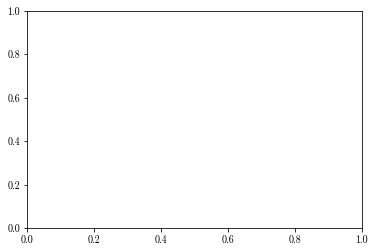

In [59]:
fig, ax = plt.subplots()

In [60]:
draw_pie(ax=ax, ratios=[0.25, 0.25, 0.25, 0.25], X=0.5, Y=0.5, size=1000)

In [155]:
def RGBtoHex(vals, rgbtype=1):
    """Converts RGB values in a variety of formats to Hex values.

     @param  vals     An RGB/RGBA tuple
     @param  rgbtype  Valid valus are:
                          1 - Inputs are in the range 0 to 1
                        256 - Inputs are in the range 0 to 255

     @return A hex string in the form '#RRGGBB' or '#RRGGBBAA'
    """

    if len(vals)!=3 and len(vals)!=4:
        raise Exception("RGB or RGBA inputs to RGBtoHex must have three or four elements!")
    if rgbtype!=1 and rgbtype!=256:
        raise Exception("rgbtype must be 1 or 256!")

    #Convert from 0-1 RGB/RGBA to 0-255 RGB/RGBA
    if rgbtype==1:
        vals = [255*x for x in vals]

    #Ensure values are rounded integers, convert to hex, and concatenate
    return '#' + ''.join(['{:02X}'.format(int(round(x))) for x in vals])

print(RGBtoHex((0.1,0.3,  1)))
print(RGBtoHex((0.8,0.5,  0)))
print(RGBtoHex((  3, 20,147), rgbtype=256))
print(RGBtoHex((  3, 20,147,43), rgbtype=256))

#1A4DFF
#CC8000
#031493
#0314932B


0.0
0.0349065850399
0.0698131700798
0.10471975512
0.13962634016
0.174532925199
0.209439510239
0.244346095279
0.279252680319
0.314159265359
,
0.314159265359
0.411897703471
0.509636141582
0.607374579694
0.705113017806
0.802851455917
0.900589894029
0.998328332141
1.09606677025
1.19380520836
,
1.19380520836
1.29852496348
1.4032447186
1.50796447372
1.61268422884
1.71740398396
1.82212373908
1.9268434942
2.03156324932
2.13628300444
,
2.13628300444
2.31081592964
2.48534885484
2.65988178004
2.83441470524
3.00894763044
3.18348055564
3.35801348084
3.53254640604
3.70707933124
,
[[ 0.          0.        ]
 [ 1.          0.        ]
 [ 0.99939083  0.0348995 ]
 [ 0.99756405  0.06975647]
 [ 0.9945219   0.10452846]
 [ 0.99026807  0.1391731 ]
 [ 0.98480775  0.17364818]
 [ 0.9781476   0.20791169]
 [ 0.97029573  0.2419219 ]
 [ 0.9612617   0.27563736]
 [ 0.95105652  0.30901699]]
[[ 0.          0.        ]
 [ 0.95105652  0.30901699]
 [ 0.91636273  0.40034903]
 [ 0.87292208  0.48785966]
 [ 0.82114921  0.5707

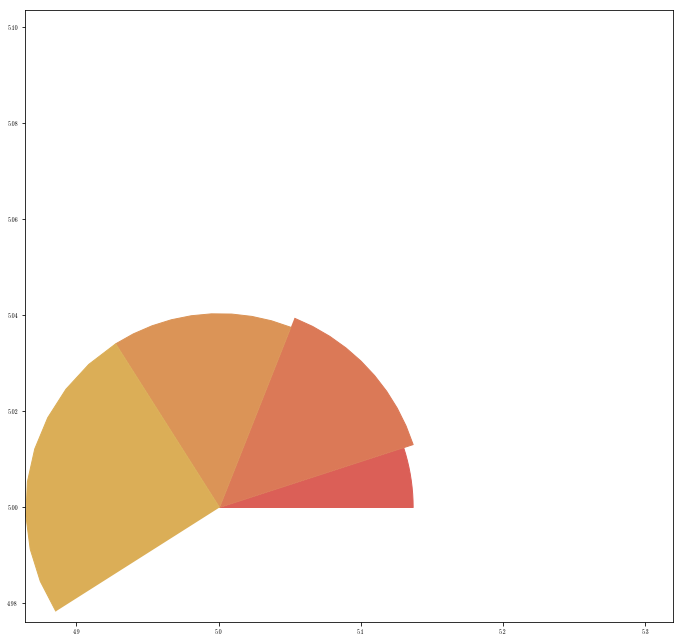

In [307]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
import urllib2
import time
import matplotlib as mpl

mpl.rcParams['font.size'] = 10.
mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 8.
mpl.rcParams['xtick.labelsize'] = 6.
mpl.rcParams['ytick.labelsize'] = 6.

colors = sns.color_palette("hls", 30)

 
def draw_pie(ax,ratios=[0.4,0.3,0.3], X=0, Y=0, size = 1000):
    N = len(ratios)
    xy = []
 
    start = 0.
    for ratio in ratios:
        x = [0]
        y = [0]
        
        linspace = np.linspace(2.*np.pi*start,2*np.pi*(start+ratio), 10)
        for l in linspace:
            print(l)
            x.append(math.cos(l))
            y.append(math.sin(l))
        print(',')
        # print(x, y)
        # xy1 = zip(x,y)
        xy1 = np.column_stack([x, y])
        xy.append(xy1)
        start += ratio
        
    for i, xyi in enumerate(xy):
        # print RGBtoHex(colors[i]), xyi
        print(xyi)
        ax.scatter([X],[Y] , marker=(xyi,0), s=[size], facecolor=colors[i] )
        
fig = plt.figure(figsize=(10,10))
#Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)

draw_pie(ax,[0.05, 0.14, 0.15, 0.25], 5, 5, size=150000)
fig.savefig('/home/bay001/pie.png')

In [289]:
2.*np.pi*0.15,2*np.pi*(0+0.15)

(0.9424777960769379, 0.9424777960769379)

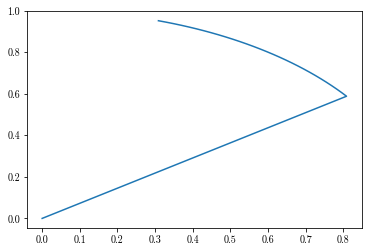

In [260]:
plt.plot([0, 0.8090169943749475, 0.7960930657056438, 0.7827954477963558, 0.7691303826016289, 0.7551042845572208, 0.7407237375691391, 0.7259954919231308, 0.7109264611160707, 0.6955237186107386, 0.6797944945155079, 0.6637461721905045, 0.6473862847818277, 0.6307225116854619, 0.6137626749425376, 0.5965147355676342, 0.5789867898118487, 0.5611870653623824, 0.5431239174804328, 0.5248058250792006, 0.5062413867438541, 0.4874393166953193, 0.46840844069979015, 0.449157691925879, 0.42969610675135167, 0.41003282052141615, 0.3901770632605545, 0.37013815533991434, 0.34992550310228854, 0.32954859444674023, 0.30901699437494745], [0, 0.5877852522924731, 0.6051742151937652, 0.6222791069201206, 0.639091898367576, 0.6556046975451959, 0.671809753279606, 0.6876994588534233, 0.70326635557588, 0.7185031362839623, 0.7334026487724224, 0.7479578991510506, 0.7621620551276365, 0.776008449215073, 0.7894905818611018, 0.8026021244992287, 0.815336922519378, 0.8276889981568906, 0.8396525532985105, 0.8512219722040424, 0.8623918241424019, 0.873156865940823, 0.8835120444460229, 0.8934524988961736, 0.9029735632025618, 0.9120707681398698, 0.9207398434440476, 0.9289767198167914, 0.936777530835689, 0.9441386147691333, 0.9510565162951535])

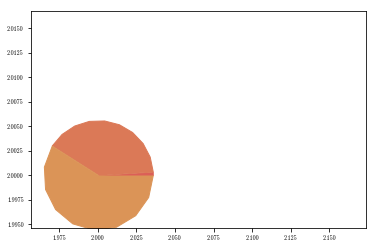

In [308]:
import numpy as np
import matplotlib.pyplot as plt


X = 2
Y = 2

# first define the ratios
r1 = 0.01       # 20%
r2 = r1 + 0.4  # 40%

# define some sizes of the scatter marker
sizes = np.array([12000])

start = 0
for r in [r1, r2]:
                     np.linspace(2.*np.pi*start,2*np.pi*(start+ratio), 10)
    x = [0] + np.cos(np.linspace(2.*np.pi*start,2*np.pi*r, 10)).tolist()
    y = [0] + np.sin(np.linspace(2.*np.pi*start,2*np.pi*r, 10)).tolist()
    xy = np.column_stack([x, y])
    xyi.append(xy)
    

s1 = np.abs(xy1).max()

x = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
y = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
xy2 = np.column_stack([x, y])
s2 = np.abs(xy2).max()

x = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
y = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
xy3 = np.column_stack([x, y])
s3 = np.abs(xy3).max()

xyi = [xy1, xy2, xy3]
fig, ax = plt.subplots()
for i in range(len(xyi)):
    ax.scatter([X], [Y], marker=(xyi[i], 0), s=sizes, facecolor=colors[i])

plt.show()

In [301]:
xy1

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.99997563,  0.00698126],
       [ 0.99990252,  0.01396218],
       [ 0.99978068,  0.02094242],
       [ 0.99961012,  0.02792164],
       [ 0.99939083,  0.0348995 ],
       [ 0.99912283,  0.04187565],
       [ 0.99880614,  0.04884977],
       [ 0.99844076,  0.0558215 ],
       [ 0.99802673,  0.06279052]])